# Rotations of a cube.
Preliminary stuff for the rotation of the Gauss lattices.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

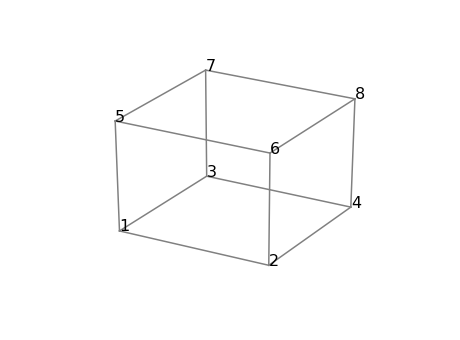

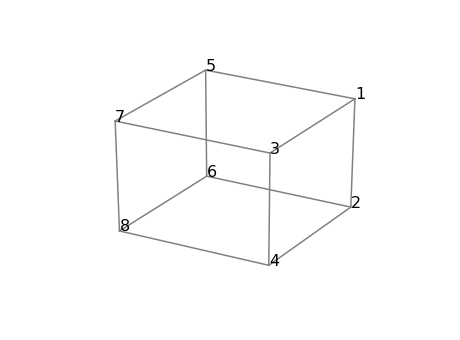

In [15]:
class Cube(object):
    """ Visualize cube rotations.
    """
        
    def __init__(self, labels=None):
        if labels is None:
            self.cube = np.array([[[1,5], [3,7]], [[2, 6], [4,8]]])
        else:
            self.cube = labels
    
    def draw(self):
        """ Takes in a 3D array and draws a cube. The cube only gives the labels.
        """
        fig = plt.figure()
        fig.set_size_inches(8,6)
        ax = fig.add_subplot(111, projection='3d')
        ax.axis(False)

        c = list(product((0,1), (0,1), (0,1)))
        links = [
            [c[0], c[1]],
            [c[0], c[2]],
            [c[0], c[4]],

            [c[6], c[7]],
            [c[6], c[4]],
            [c[6], c[2]],

            [c[3], c[7]],
            [c[3], c[1]],
            [c[3], c[2]],

            [c[5], c[7]],
            [c[5], c[4]],
            [c[5], c[1]]
        ]
        for l in links:
            ax.plot([l[0][0], l[1][0]], [l[0][1], l[1][1]], [l[0][2], l[1][2]], color='gray')

        for e in c:
            ax.text(*e, self.cube[e], fontsize=16)

        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.2)
        ax.set_zlim(-0.2, 1.2)
        
        
    def _rotation_sequence(self, rotations, steps):
        """ Performs a sequence of rotations.
        """
        for i in range(steps):
            for ax, steps in rotations:
                self.c4(ax, steps=steps)
        
    def c4(self, axis, steps=1):
        """ Rotation around coordinate axes.  
            
            Notes:
             - 3 axes with 3 rotations of 90 degrees = 1 step
             - 4 steps are the identity
             - 9 elements
        """
        ax = {
            'x' : (1,2),
            'y' : (2,0),
            'z' : (0,1), 
        }
        self.cube = np.rot90(self.cube, k=steps, axes=ax[axis])
            
    def c3(self, axis, steps=1):
        """ Rotation around the diagonals between to opposite corners. 
            
            Notes:
             - 4 axes with 2 rotations of 120 degrees = 1 step
             - 3 steps are the identity
             - 8 elements
             
             Axis numeration, denotes connected corners:
              0 : (1) - (8)
              1 : (2) - (7)
              2 : (4) - (5)
              3 : (3) - (6)
        """
        rotations = [
            [['y', -1], ['z', -1]],
            [['y', 1], ['z', 1]],
            [['y', 1], ['z', -1]],
            [['z', -1], ['y', 1]],
        ]
        self._rotation_sequence(rotations[axis], steps)
        
    def c2(self, axis, steps=1):
        """ Rotation about axes on oposite edges.
            
            Notes:
             - 6 axes with 1 rotation of 180 degrees = 1 step
             - 2 steps are the identity
             - 6 elements
             
             Axis numeration, denotes connected links:
              0 : (2,4) - (5,7)
              1 : (1,3) - (6,8)
              2 : (5,6) - (3,4)
              3 : (1,2) - (7,8)
              4 : (2,6) - (3,7)
              5 : (1,5) - (4,8)
        """
        rotations = [
            [['z', 2], ['y', 1]],
            [['z', 2], ['y', -1]],
            [['y', 2], ['x', 1]],
            [['y', 2], ['x', -1]],
            [['x', 2], ['z', 1]],
            [['x', 2], ['z', -1]],
        ]
        self._rotation_sequence(rotations[axis], steps)
        
    
cube = Cube()
cube.draw()
cube.c2(axis=1, steps=1)
cube.draw()